# Plot clustermap ConsensusTME gene set overlaps

Script related to figure s3B

### Aim:
- Plot clustermap of consensusTME gene set overlaps

In [1]:
!python --version

Python 3.6.8 :: Anaconda custom (64-bit)


## Import packages

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl

In [3]:
home = "~/git_repos/HGSOC_TME_Heterogeneity/"

## Load ConsensusTME overlap data

In [4]:
file_consensus_overlap = home + 'Data/3/ConsensusTME_geneset_overlap.txt'

consensus_overlap = pd.read_csv(file_consensus_overlap, sep='\t')

In [5]:
consensus_overlap.head()

,B_cells,Cytotoxic_cells,Dendritic_cells,Endothelial,Eosinophils,Fibroblasts,Macrophages,Macrophages_M1,Macrophages_M2,Mast_cells,Monocytes,NK_cells,Neutrophils,Plasma_cells,T_cells_CD4,T_cells_CD8,T_cells_gamma_delta,T_regulatory_cells
B_cells,1.000000,0.111111,0.315789,0.111111,0.200000,0.076923,0.157895,0.210526,0.105263,0.250,0.210526,0.105263,0.052632,0.272727,0.315789,0.157895,0.105263,0.210526
Cytotoxic_cells,0.111111,1.000000,0.222222,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.125,0.111111,1.000000,0.111111,0.111111,0.555556,0.888889,0.777778,0.111111
Dendritic_cells,0.315789,0.222222,1.000000,0.222222,0.333333,0.076923,0.463415,0.514286,0.500000,0.375,0.360000,0.160000,0.272727,0.181818,0.220000,0.160000,0.181818,0.200000
Endothelial,0.111111,0.111111,0.222222,1.000000,0.111111,0.111111,0.222222,0.222222,0.222222,0.125,0.111111,0.111111,0.111111,0.111111,0.111111,0.000000,0.111111,0.111111
Eosinophils,0.200000,0.111111,0.333333,0.111111,1.000000,0.076923,0.266667,0.200000,0.133333,0.375,0.266667,0.133333,0.266667,0.181818,0.333333,0.200000,0.200000,0.133333


## Plot clustermap

### Generate discrete colormap

In [6]:
def cmap_discretize(cmap, N):
    
    """
    Return a discrete colormap from the continuous colormap cmap.
    
    cmap: colormap instance, eg. cm.jet. 
    N: number of colors.
    """
    
    if type(cmap) == str:
        
        cmap = get_cmap(cmap)
    
    colors_i = np.concatenate((np.linspace(0,1.,N), (0.,0.,0.,0.)))
    colors_rgba = cmap(colors_i)
    indices = np.linspace(0,1.,N+1)
    cdict = {}
    
    for ki, key in enumerate(('red','green','blue')):
        
        cdict[key] = [(indices[i],colors_rgba[i-1,ki],
                       colors_rgba[i,ki]) for i in range(N+1)]
        
    # Return colormap object.
    return mpl.colors.LinearSegmentedColormap(cmap.name+"_%d"%N,cdict,1024)

In [7]:
discretized_cmap = cmap_discretize(mpl.cm.hot_r,10)

### Define gene set colors

In [8]:
GREEN = '#007F00'
RED = '#CC0000'
GREY = '#D3D3D3'
BLUE = '#0000E5'
YELLOW = '#FFFF00'

color_sets = {
'Endothelial':                                  RED,
'B_cells':                                      '#A6CDE1',
'T_cells_CD8':                                  '#FFDD15',
'Cytotoxic_cells':                              '#FFD400',
'Dendritic_cells':                              '#A181BA',
'Eosinophils':                                  '#D8AF62',
'Macrophages':                                  '#F58A21',
'Macrophages_M1':                               '#F58A21',
'Macrophages_M2':                               '#F58A21',
'Monocytes':                                    '#F58A21',
'Mast_cells':                                   '#F7F29B',
'NK_cells':                                     '#70B09D',
'Neutrophils':                                  '#B05A28',
'T_cells_gamma_delta':                          '#4F9F45',
'T_cells_CD4':                                  '#EC1C24',
'T_regulatory_cells':                           '#67B853',
'Plasma_cells':                                 '#A6CDE1',
'Fibroblasts':                                  BLUE,
'TumourCellularity_mRNA':                       'k'
}

In [9]:
color_sets_df = pd.DataFrame.from_dict(color_sets, orient='index')

In [10]:
color_sets_df.head()

,0
Endothelial,#CC0000
B_cells,#A6CDE1
T_cells_CD8,#FFDD15
Cytotoxic_cells,#FFD400
Dendritic_cells,#A181BA


### Plot

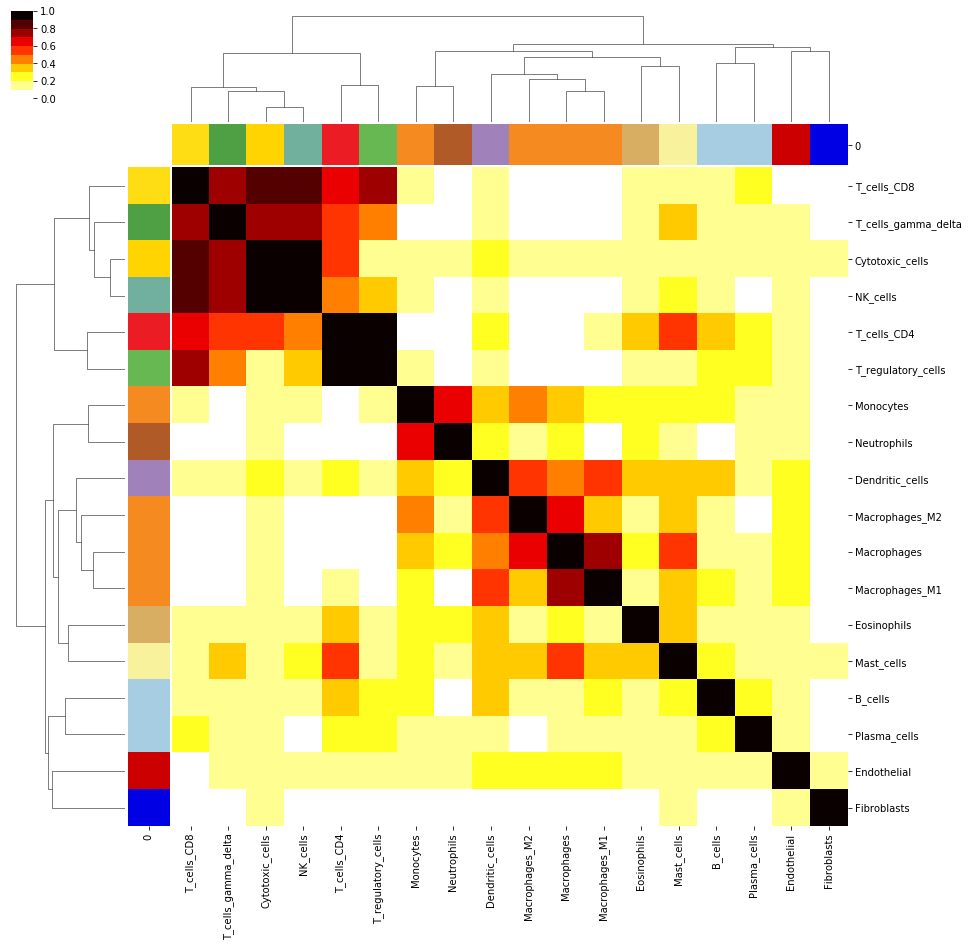

In [11]:
g = sns.clustermap(consensus_overlap,
                   cmap=discretized_cmap,
                   figsize=(15,15),
                   #metric='correlation', # this owuld do correlation of correlation
                   row_cluster=True,
                   col_cluster=True,
                   row_colors=color_sets_df[0],
                   col_colors=color_sets_df[0],
                   linewidths=0.0, rasterized=True)

### Save plot

In [12]:
FILE = "../../Figures/supplementary/3/panels/s3b_ConsensusTME_overlap_clustermap"

g.savefig(FILE, bbox='tight')

# End script